# Infojoints

In [13]:
def find_joints_box(im,perc_w =0.1, perc_h=0.1):
    shapy = im.shape
    left = []
    right = []
    top = []
    bottom = []

    for i in range(shapy[0]):
        for j in range(shapy[1]):
            if im[i,j] != 0:
                left.append(j)
                break
        for j in range(shapy[1]-1,-1,-1):
            if im[i,j] != 0:
                right.append(j)
                break

    for j in range(shapy[1]):
        for i in range(shapy[0]):
            if im[i,j] != 0:
                top.append(i)
                break
        for i in range(shapy[0]-1,-1,-1):
            if im[i,j] != 0:
                bottom.append(i)
                break
    
    if len(bottom) != 0:
        f_left = np.min(left)
        f_right = np.max(right)
        f_top = np.min(top)
        f_bottom = np.max(bottom)

        width = np.abs(f_right -f_left)
        height = np.abs(f_bottom -f_top)

        x = int(np.floor(f_left + width/2))
        y = int(np.floor(f_top +height/2))
        
    else:
        x = -1
        y = -1
        width,height = 0,0

    return x,y, max(width, height)

In [14]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import imageio
from skimage.transform import resize,rescale, rotate

In [15]:
obj_path = "./SURREAL/cmu/cluster_mod_train_heal/annotations/02_05_c0005_segm_80.png"

In [16]:
im = imageio.imread(obj_path)

## function for array of joints and box

In [17]:
def joints(image, n_joints):
    coords = np.zeros((n_joints,2))
    for i in range(1, n_joints+1):
        n_im = np.where(image==i,1,0)
        x,y,size = find_joints_box(n_im)
        coords[i-1] = x,y
    
    return coords, size

In [18]:
coord,s = joints(im, 24)

In [19]:
coord.reshape(-1)

array([172., 157., 185., 197., 156., 194., 170., 121., 188., 245., 150.,
       252., 170., 105., 190., 281., 155., 289., 166.,  83.,  -1.,  -1.,
       140., 293., 151.,  60., 184.,  77., 142.,  80., 150.,  45., 202.,
       102., 138., 103., 203., 120., 131., 123.,  -1.,  -1., 114., 131.,
        -1.,  -1., 109., 133.])

In [20]:
for i in range(len(coord)):
    print(np.array_equal(coord[i],[-1,-1]))

False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
True
False


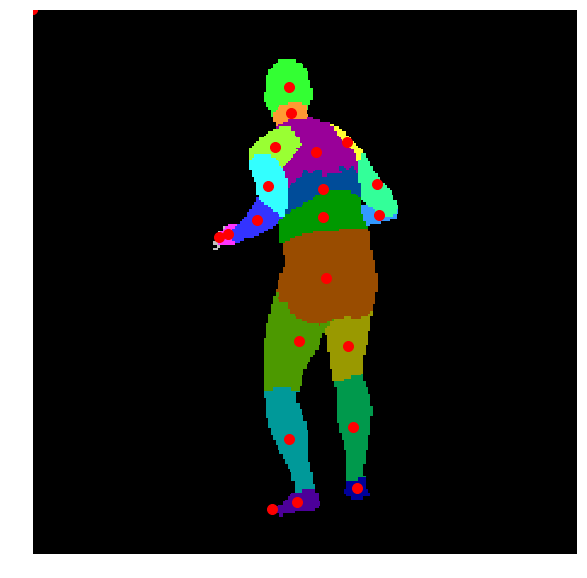

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(coord[:,0],coord[:,1], color='red', s=100)
plt.imshow(f_im4)
plt.axis('off')
plt.savefig("./written/final/Figures/central_point_parts.png",bbox_inches='tight')

In [23]:
str1 = ' '.join(str(e) for e in list(coord.reshape(-1)))
str1

'172.0 157.0 185.0 197.0 156.0 194.0 170.0 121.0 188.0 245.0 150.0 252.0 170.0 105.0 190.0 281.0 155.0 289.0 166.0 83.0 -1.0 -1.0 140.0 293.0 151.0 60.0 184.0 77.0 142.0 80.0 150.0 45.0 202.0 102.0 138.0 103.0 203.0 120.0 131.0 123.0 -1.0 -1.0 114.0 131.0 -1.0 -1.0 109.0 133.0'

In [24]:
im = scio.loadmat('SURREAL/cmu/train/run0/02_05/02_05_c0005_info.mat')
im_2 = scio.loadmat('SURREAL/cmu/train/run0/02_05/02_05_c0005_segm.mat')


In [57]:
new_joints = np.stack([im['joints2D'][:,:,79][0],im['joints2D'][:,:,79][1]]).reshape(-1,2)

In [25]:
label_colours = [[0, 0, 0], [153, 76, 0], [153, 153, 0]
                # 0 = road, 1 = sidewalk, 2 = building
                ,[76, 153, 0], [0, 153, 0], [0, 153, 76]
                # 3 = wall, 4 = fence, 5 = pole
                ,[0,153, 153], [0, 76, 153], [0, 0, 153]
                # 6 = traffic light, 7 = traffic sign, 8 = vegetation
                ,[76, 0, 153], [153, 0, 153], [153, 0, 76]
                # 9 = terrain, 10 = sky, 11 = person
                ,[255, 51, 51], [255, 153, 51], [255, 255, 51]
                # 12 = rider, 13 = car, 14 = truck
                ,[153, 255, 51], [51, 255, 51], [51, 255, 153]
                # 15 = bus, 16 = train, 17 = motocycle
                ,[51, 255, 255], [51,153,255],[51,51,255],[153,51,255],[255,52,255],[255,52,153], [192,192,192]]
                # 18 = bicycle

im_1 = im_2['segm_80']

n_classes=25

im4 = decode_labels(im_1,im_1.shape, 25, label_colours)

with tf.Session() as sess:

    f_im4= sess.run(im4)


In [31]:
import math
l,t,r,b = find_crops(im_1)

10 239 41 270


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


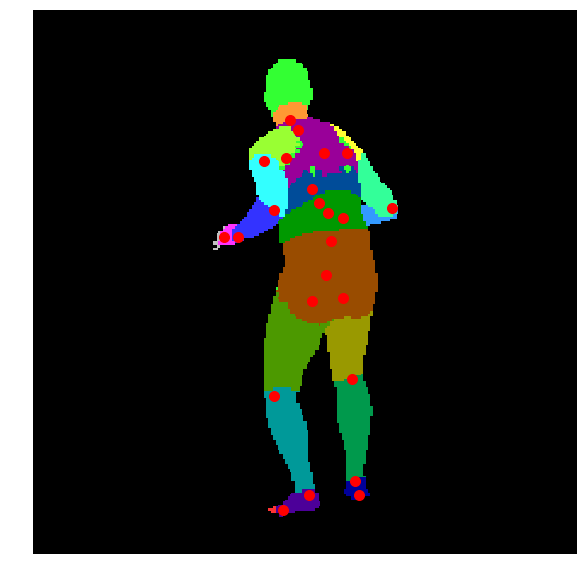

In [38]:
plt.figure(figsize=(10,10))
plt.scatter((im['joints2D'][:,:,79][0]-l)*320/(max(r-l,b-t)),(im['joints2D'][:,:,79][1]-t)*320/(max(r-l,b-t)),
            color="red", s=100)
#plt.scatter(jointies[:,0],jointies[:,1])
plt.imshow(sc.misc.imresize(crop(f_im4,l,t,r,b), (320,320), interp="nearest"))
plt.axis('off')
plt.savefig("./written/final/Figures/surreal_joints.png", bbox_inches = "tight")


## crear archivo para joints

In [46]:
def rad_original_file(which="train"):
    if which=="train":
        file ='./hourglass/hourglasstensorlfow/list/train_cluster_list.txt'
    elif which=="eval":
        file = "./hourglass/hourglasstensorlfow/list/eval_cluster_list.txt"
    else:
        file ="./hourglass/hourglasstensorlfow/list/test_cluster_list.txt"
        
    data_dict = {}
    train_table = []
    input_file = open(file, 'r')
    print('READING TRAIN DATA')
    for line in input_file:
        line = line.strip()
        line = line.split(' ')
        name = line[0]
        gt_name = line[1]

        data_dict[name] = {'gt_name' : gt_name}
        train_table.append(name)
            #lista de diccionarios con caja, coordin. de joints y weights de cada uno de los joints
    input_file.close()
    return data_dict, train_table

In [88]:
def define_joints_file(which="train"):
    d_dict, table = rad_original_file(which)
    if which=="train":
        first_path = "./SURREAL/cmu/cluster_mod_train_heal/"
        file_name = "./hourglass/train_head.txt"
        
    elif which=="eval":
        first_path = "./SURREAL/cmu/cluster_mod_eval_heal/"
        file_name = "./hourglass/eval_head.txt"
    else:
        first_path = "./SURREAL/cmu/cluster_mod_test_heal/"
        file_name = "./hourglass/test_head.txt"
    
    with open(file_name, 'w') as f:
        count = 0
        for i in table:
            gt_name = d_dict[i]['gt_name']
            namy = os.path.join(first_path, gt_name)
            im = imageio.imread(namy)
            coord,s = joints(im, 24)
            d_dict[i]['joints'] = coord
            str1 = ' '.join(str(e) for e in list(coord.reshape(-1)))
            f.write(i + " " + str1 + "\n")
            count += 1
            if count % 2500 == 0: print(count)
        f.close()
    
    
    

In [51]:
define_joints_file()
define_joints_file("eval")
define_joints_file("test")

READING TRAIN DATA


KeyboardInterrupt: 

## crear archivo con los joints del original dataset

In [51]:
def create_joints_file(which="train"):
    d_dict, table = rad_original_file(which)
    print("File creation begun")
    if which=="train":
        first_path = "./SURREAL/cmu/train/run0/"
        file_name = "./hourglass/train_joints.txt"
        
    elif which=="eval":
        first_path = "./SURREAL/cmu/val/run0/"
        file_name = "./hourglass/eval_joints.txt"
    else:
        first_path = "./SURREAL/cmu/test/run0/"
        file_name = "./hourglass/test_joints.txt"
    
    with open(file_name, 'w') as f:
        count = 0
        for i in table:
            gt_name = d_dict[i]['gt_name']
            namy = os.path.join(first_path, gt_name)
            coord = obtain_path_n_joints(gt_name, first_path)
            d_dict[i]['joints'] = coord.reshape(-1,2)
            str1 = ' '.join(str(e) for e in list(coord.reshape(-1)))
            f.write(i + " " + str1 + "\n")
            count += 1
            if count % 1000 == 0: print(count);
        f.close()
    

In [52]:
def obtain_path_n_joints(gt, root):
    
    parts = gt.split("/")[1].split("_")
    
    if parts[0] == "ung":
        next_1 = "_".join(parts[:3])
        next_2 = "_".join(["_".join(parts[:4]), "info.mat"])
        next_3 = "_".join(["_".join(parts[:4]), "segm.mat"])
        number = parts[-1].split(".")[0]
        name = str("segm_"+ str(number))
    else:
        next_1 = "_".join(parts[:2])
        next_2 = "_".join(["_".join(parts[:3]), "info.mat"])
        next_3 = "_".join(["_".join(parts[:3]), "segm.mat"])
        number = parts[-1].split(".")[0]
        name = str("segm_"+ str(number))
        
    complete_path = os.path.join(root, next_1, next_2)
    complete_2  = os.path.join(root, next_1, next_3)
    im = scio.loadmat(complete_path)
    n_im = scio.loadmat(complete_2)[name]
    l,t,r,b = find_crops(n_im)
    w = r-l
    
    joints_x = ((im['joints2D'][:,:,int(number)-1][0]-l)*320/(w+0.000001)).astype(np.int32)
    joints_y = ((im['joints2D'][:,:,int(number)-1][1]-t)*320/(w+0.000001)).astype(np.int32)
    joints= np.c_[joints_x, joints_y]
    
    return joints

In [53]:
create_joints_file()
create_joints_file("eval")
create_joints_file("test")

READING TRAIN DATA
File creation begun
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
READING TRAIN DATA
File creation begun
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
READING TRAIN DATA
File creation begun
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


## Pasar joints relativos

In [42]:
import scipy as sc
import scipy.io as scio
from scipy import ndimage, misc
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import imageio
from skimage.transform import resize,rescale, rotate
import math

In [41]:
def find_crops(im,perc_w =0.1, perc_h=0.1):
    shapy = im.shape
    left = []
    right = []
    top = []
    bottom = []

    for i in range(shapy[0]):
        for j in range(shapy[1]):
            if im[i,j] != 0:
                left.append(j)
                break
        for j in range(shapy[1]-1,-1,-1):
            if im[i,j] != 0:
                right.append(j)
                break

    for j in range(shapy[1]):
        for i in range(shapy[0]):
            if im[i,j] != 0:
                top.append(i)
                break
        for i in range(shapy[0]-1,-1,-1):
            if im[i,j] != 0:
                bottom.append(i)
                break
    try:
        f_left = np.min(left)
        f_right = np.max(right)
        f_top = np.min(top)
        f_bottom = np.max(bottom)

        width = f_right -f_left
        height = f_bottom -f_top

        wth_plus = width*perc_w
        hgt_plus= height*perc_h

        f_left = int(round(f_left - wth_plus,0))
        f_right = int(round(f_right + wth_plus,0))
        f_top = int(round(f_top - hgt_plus,0))
        f_bottom = int(round(f_bottom + hgt_plus,0))

        new_w = f_right - f_left
        new_h = f_bottom - f_top

        if new_h > new_w:
            center = f_left + new_w/2
            f_left = int(math.ceil(center - new_h/2))
            f_right = int(math.ceil(center + new_h/2))
        else:
            center = f_top + new_h/2
            f_top = int(math.ceil(center - new_w/2))
            f_bottom = int(math.ceil(center + new_w/2))

        if f_left < 0: 
            residual = -f_left
            f_left = 0
            f_right = f_right + residual
        if f_right > shapy[1]-1: 
            residual = f_right -(shapy[1]-1)
            f_right = shapy[1]-1
            f_left = f_left -residual
        if f_top < 0:
            residual = -f_top
            f_top = 0
            f_bottom = f_bottom + residual
        if f_bottom > shapy[0]-1: 
            residual = f_bottom -(shapy[0]-1)
            f_bottom = shapy[0]-1
            f_top = f_top -residual

        if f_left < 0: f_left = 0
        if f_right > shapy[1]-1: f_right = shapy[1]-1
        if f_top < 0: f_top = 0
        if f_bottom > shapy[0]-1:f_bottom = shapy[0]-1
            
        if np.abs(f_right-f_left-(f_bottom-f_top)) == 1:
            if f_bottom-f_top > f_right-f_left:
                if f_left != 0:
                    f_left -= 1
                else:
                    f_right +=1
            if f_bottom-f_top < f_right-f_left:
                if f_top != 0:
                    f_top -= 1
                else:
                    f_bottom +=1  

        if f_right-f_left != f_bottom-f_top:
            if shapy[0] == np.min(shapy):
                if f_right-f_left > shapy[0]-1:
                    center = f_left + (f_right-f_left)/2
                    f_left = int(math.ceil(center - (shapy[0]-1)/2))
                    f_right = int(math.ceil(center +(shapy[0]-1)/2))
                if f_right-f_left < shapy[0]-1:
                    if f_left == 0:
                        f_right = shapy[0]-1
                    if f_right == shapy[1]-1:
                        f_left = f_left - (shapy[0]-(f_right-f_left))
            if shapy[1] == np.min(shapy):
                if f_bottom-f_top > shapy[1]:

                    center = f_top + (f_bottom-f_top)/2
                    f_top = int(math.ceil(center - (shapy[1]-1)/2))
                    f_bottom= int(math.ceil(center +(shapy[1]-1)/2))
                if f_bottom-f_top < shapy[1]-1:
                    if f_top == 0:
                        f_bottom = shapy[1]-1
                    if f_bottom == shapy[0]-1:
                        f_top = f_top - (shapy[1]-(f_bottom-f_top))


    except ValueError:
        if shapy[0] == np.min(shapy):
            f_left = 0
            f_right = shapy[0]-1
            f_bottom = shapy[0]-1
            f_top = 0
        if shapy[1]== np.min(shapy):
            f_left = 0
            f_right = shapy[1]-1
            f_bottom = shapy[1]-1
            f_top = 0
        
    assert f_right-f_left == f_bottom-f_top
    
    return f_left,f_top,f_right,f_bottom

def crop(im, f_left,f_top,f_right, f_bottom):
    new_im = im[f_top:f_bottom, f_left:f_right]
    print(f_top, f_bottom, f_left,f_right)
    return new_im

def resizeim(new_im, shapy):
    final_im = sc.misc.imresize(new_im, shapy, interp="nearest")
    return final_im


In [63]:
im_2 = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_segm.mat')
im = scio.loadmat('SURREAL/cmu/train/run0/01_01/01_01_c0001_info.mat')
seg1 = im_2['segm_1']

21 229 51 259
(208, 208)


/home/blue/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:136: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


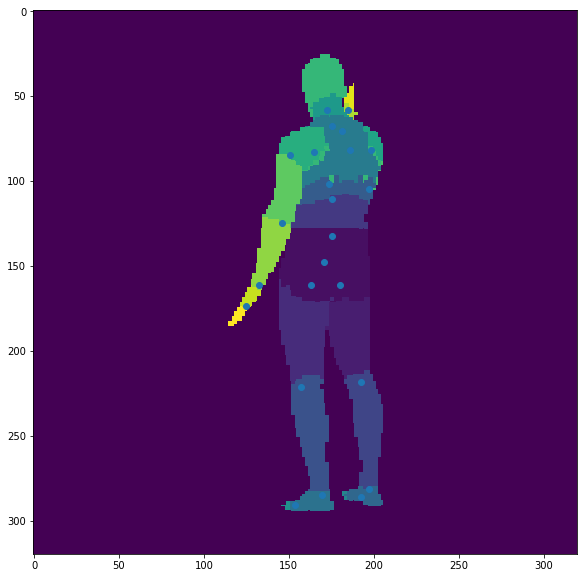

In [64]:
l,t,r,b = find_crops(im_2['segm_1'])
new_im =crop(im_2['segm_1'],l,t,r,b)
print(new_im.shape)
plt.figure(figsize=(10,10))
dif_x,dif_y = 320-new_im.shape[0], 240-new_im.shape[1]
#plt.imshow(new_im)
#plt.scatter(im['joints2D'][:,:,0][0]-51,im['joints2D'][:,:,0][1]-21, c='red')
plt.imshow(resizeim(new_im, (320,320)))
plt.scatter((im['joints2D'][:,:,0][0]-51)*320/208,
            (im['joints2D'][:,:,0][1]-21)*320/208)

In [83]:
joints_x = ((im['joints2D'][:,:,0][0]-51)*320/208).astype(np.int32)
joints_y = ((im['joints2D'][:,:,0][1]-21)*320/208).astype(np.int32)
joints = joints_x,joints_y
np.c_[joints]

array([[170, 147],
       [180, 161],
       [163, 161],
       [175, 132],
       [192, 218],
       [156, 221],
       [175, 110],
       [196, 281],
       [169, 284],
       [173, 101],
       [192, 286],
       [153, 290],
       [175,  67],
       [186,  81],
       [164,  83],
       [172,  58],
       [198,  81],
       [150,  84],
       [196, 104],
       [146, 124],
       [181,  70],
       [132, 161],
       [184,  58],
       [124, 173]], dtype=int32)

In [79]:
joints.reshape(-1,2)

array([[170, 147],
       [180, 161],
       [163, 161],
       [175, 132],
       [192, 218],
       [156, 221],
       [175, 110],
       [196, 281],
       [169, 284],
       [173, 101],
       [192, 286],
       [153, 290],
       [175,  67],
       [186,  81],
       [164,  83],
       [172,  58],
       [198,  81],
       [150,  84],
       [196, 104],
       [146, 124],
       [181,  70],
       [132, 161],
       [184,  58],
       [124, 173]], dtype=int32)

### Comprobacion joints

In [54]:
input_file = open("./hourglass/train_joints.txt", 'r')
for line in input_file:
    line = line.strip()
    line = line.split(' ')
    name = line[0]
    joints = list(map(int,line[1:]))
    joints = np.reshape(joints, (-1,2))
    break

In [55]:
im = imageio.imread("./SURREAL/cmu/cluster_mod_train_heal/" + name)

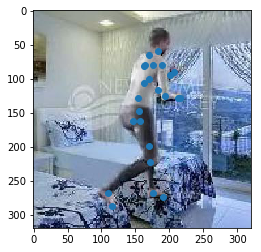

In [56]:
plt.imshow(im)
plt.scatter(joints[:,0], joints[:,1])